In [24]:
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt
rng = np.random.default_rng()

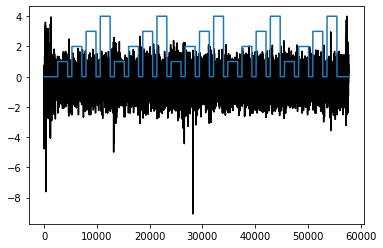

In [25]:
data = np.load("./Pre-Processing/spectral/np_filt_ica_car.npy")
sg   = data[5]
cl   = data[-1]
plt.plot(sg / max(sg) * max(cl), color = "black")
plt.plot(cl)

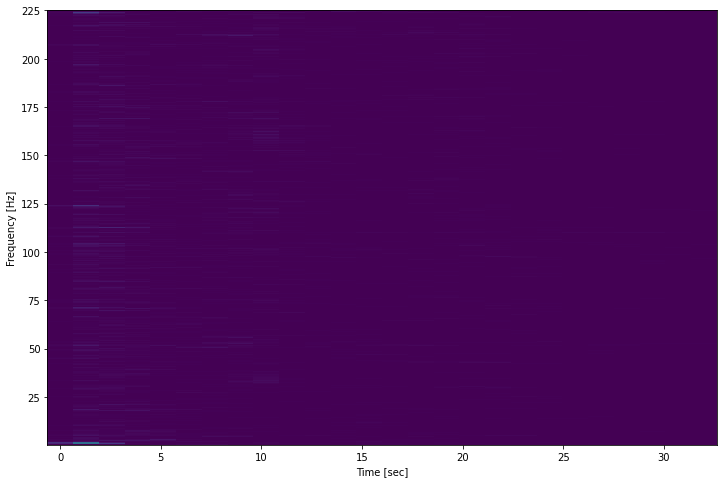

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

f, t, Sxx = signal.spectrogram(sg, fs=256, nperseg=200, window=('hamming'), noverlap=100)

fmin = 0 # Hz
fmax = 32 # Hz
freq_slice = np.where((f >= fmin) & (f <= fmax))

# keep only frequencies of interest
f   = f[freq_slice]
Sxx = Sxx[freq_slice,:][0]


plt.np.exp(Sxx.T), shading="nearest")pcolormesh(f, t, 
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

## 

In [84]:
Sxx.shape

(32, 576)

In [133]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=7):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

ee = 0.4

o10 = butter_bandpass_filter(sg, 10-ee, 10+ee, 256)
o11 = butter_bandpass_filter(sg, 11-ee, 11+ee, 256)
o12 = butter_bandpass_filter(sg, 12-ee, 12+ee, 256)
o13 = butter_bandpass_filter(sg, 13-ee, 13+ee, 256)

o10 = o10/max(o10)
o11 = o11/max(o11)
o12 = o12/max(o12)
o13 = o13/max(o13)

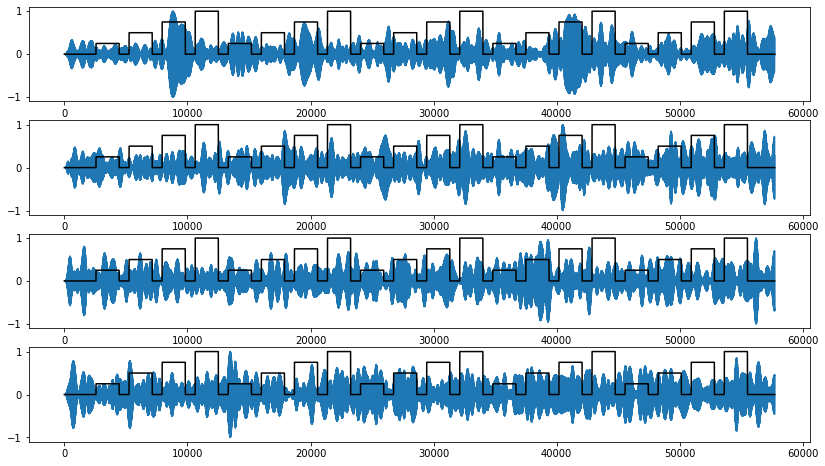

In [134]:
fig, ax = plt.subplots(nrows = 4, ncols = 1, figsize=(14,8))
ax[0].plot(o10)
ax[1].plot(o11)
ax[2].plot(o12)
ax[3].plot(o13)
for i in range(4):
    ax[i].plot(cl / max(cl) * max(o10), color="black")